# Exploring Classification with TPOT

In [1]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.7 MB/s 
     |████████████████████████████████| 160 kB 38.2 MB/s 
     |████████████████████████████████| 192.9 MB 54 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=22ef0ea1e6c5660739327b2ac26444fcd08b6b25e64ca9f2bbc7f7480484854d
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#import libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False

df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-Automation-with-TPOT/main/Chapter04/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#checking for null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

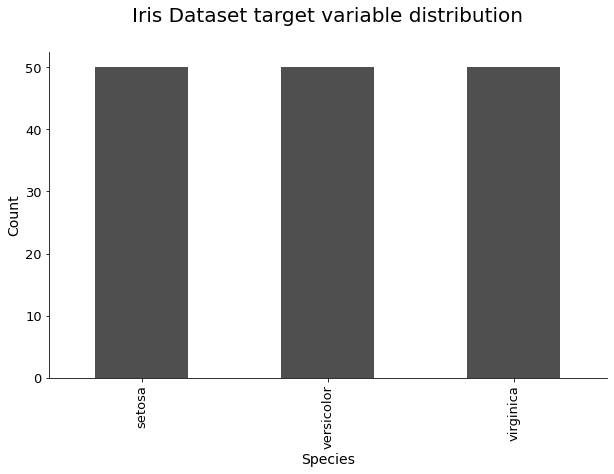

In [4]:
#Viewing the distribution in the target variable

ax = df.groupby("species").count().plot(kind="bar",figsize=(10,6),fontsize=13,color="#4f4f4f")
ax.set_title("Iris Dataset target variable distribution",size=20,pad=30)
ax.set_ylabel("Count",fontsize=14)
ax.set_xlabel("Species",fontsize=14)
ax.get_legend().remove()

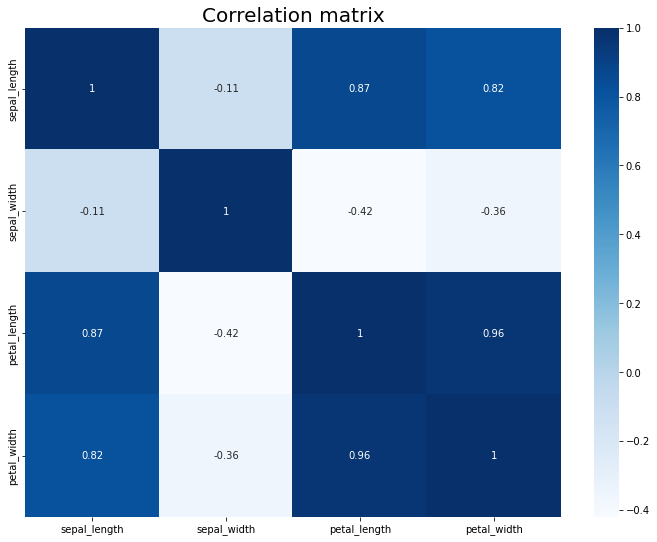

In [5]:
#showing the correlation matrix

plt.figure(figsize=(12,9))
plt.title("Correlation matrix",size=20)
sns.heatmap(df.corr(),annot=True,cmap="Blues");

In [6]:
#breaking up the dataset in to train/test split

from sklearn.model_selection import train_test_split
X = df.drop("species",axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=3
)

y_train.shape,y_test.shape

((112,), (38,))

In [7]:
#creating a baseline model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lm = LogisticRegression(random_state=42)
lm.fit(X_train,y_train)
lm_preds = lm.predict(X_test)
print(confusion_matrix(y_test,lm_preds))

[[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [8]:
# Viewing the accuracy_Score

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lm_preds))

0.9736842105263158


In [9]:
#Creating the automated pipeline using TPOT

from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(
    scoring="accuracy",
    max_time_mins=10,
    random_state=42,
    verbosity=2
)
pipeline_optimizer.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9822134387351777

Generation 2 - Current best internal CV score: 0.9822134387351777

Generation 3 - Current best internal CV score: 0.9822134387351777

Generation 4 - Current best internal CV score: 0.9826086956521738

Generation 5 - Current best internal CV score: 0.9826086956521738

Generation 6 - Current best internal CV score: 0.9826086956521738

Generation 7 - Current best internal CV score: 0.9826086956521738

Generation 8 - Current best internal CV score: 0.9826086956521738

10.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.001)


TPOTClassifier(max_time_mins=10, random_state=42, scoring='accuracy',
               verbosity=2)

In [10]:
#checking to accuracy of the automated pipeline

tpot_preds = pipeline_optimizer.predict(X_test)
accuracy_score(y_test,tpot_preds)

0.9736842105263158

In [11]:
#not much improvement from the baseline model

# Applying automated classification modeling to the titanic dataset

In [12]:
#reading in dataset

df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-Automation-with-TPOT/main/Chapter04/data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Check for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#function to display bar chat with column counts on top of the bars

def make_bar_chart(column, title, ylabel, xlabel, y_offset=10,x_offset=0.2):
  ax = df.groupby(column).count()[["PassengerId"]].plot(
      kind="bar",figsize=(10,6),fontsize=13,color="#4f4f4f"
  )
  ax.set_title(title,size=20,pad=30)
  ax.set_ylabel(ylabel,fontsize=14)
  ax.set_xlabel(xlabel,fontsize=14)
  ax.get_legend().remove()

  for i in ax.patches:
    ax.text(i.get_x() + x_offset, i.get_height() + y_offset, i.get_height(),fontsize=20)
  return ax 

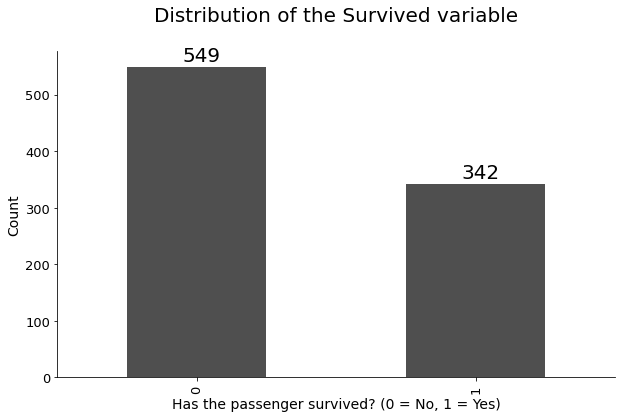

In [15]:
#Creating a bar chart showing how many survived and how many didn't

make_bar_chart(
    column = "Survived",
    title="Distribution of the Survived variable",
    ylabel = "Count",
    xlabel = "Has the passenger survived? (0 = No, 1 = Yes)"
);

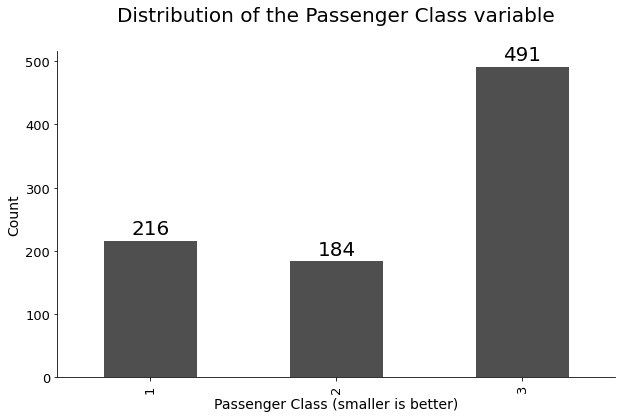

In [16]:
#Visualizing the number of passengers in each passenger class

make_bar_chart(
    column="Pclass",
    title="Distribution of the Passenger Class variable",
    ylabel="Count",
    xlabel="Passenger Class (smaller is better)",
    x_offset=0.15
);

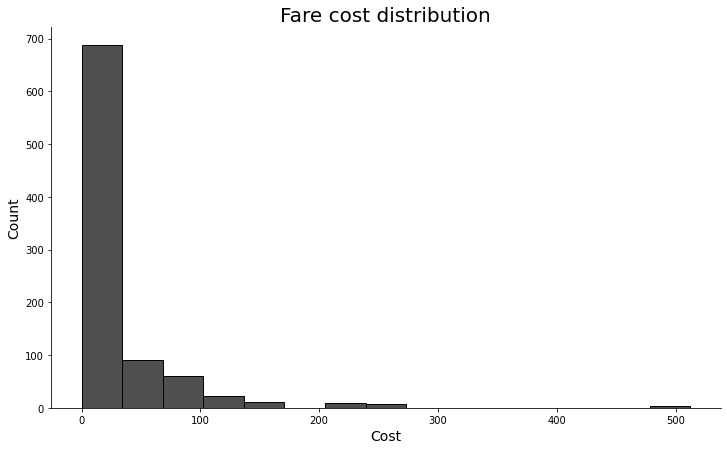

In [17]:
#Creating a histogram showing the distribution of the amounts paid for the ticket

plt.figure(figsize=(12,7))
plt.title("Fare cost distribution",size=20)
plt.xlabel("Cost",size=14)
plt.ylabel("Count",size=14)
plt.hist(df["Fare"],bins=15,color="#4f4f4f",ec="#040404");


In [18]:
#Droping the 2 cols that are of no use Ticket and PassengerId

df.drop(["Ticket","PassengerId"],axis=1,inplace=True)

In [19]:
#Remapping the sex col
gender_mapper = {"male":0,"female":1}
df["Sex"].replace(gender_mapper,inplace=True)

In [20]:
#converting the title column into a binary one
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].strip().split(" ")[0])
df["Title"] = [0 if x in ["Mr.","Miss.","Mrs."] else 1 for x in df["Title"]]
df = df.rename(columns={"Title":"Title_Unusual"})
df.drop("Name",axis=1,inplace=True)

In [22]:
#Handling missing values in the Cabin col by turning the attribute into a binary one. The value is 0 if the value for the cabin is missing

df["Cabin_Known"] = [0 if str(x) == "nan" else 1 for x in df["Cabin"]]
df.drop("Cabin",axis=1,inplace=True)

In [23]:
#creating dummy varaibles 

emb_dummies = pd.get_dummies(df["Embarked"],drop_first=True,prefix="Embarked")
df = pd.concat([df,emb_dummies],axis=1)
df.drop("Embarked",axis=1,inplace=True)


In [24]:
#repalcing missing values in the age col with the avg

df["Age"] = df["Age"].fillna(int(df["Age"].mean()))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [25]:
#Splitting the dataset into train/test split

X = df.drop("Survived",axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
  X,y, test_size=0.25,random_state=42
)
y_train.shape, y_test.shape

((668,), (223,))

In [26]:
#creating the baseline model

lm = LogisticRegression(random_state=42)
lm.fit(X_train,y_train)
lm_preds = lm.predict(X_test)
print(confusion_matrix(y_test,lm_preds))

[[111  23]
 [ 23  66]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
#using f1 score as the metric

from sklearn.metrics import f1_score
print(f1_score(y_test,lm_preds))

0.7415730337078652


In [28]:
#using TPOT to see if the automated classification can do better

pipeline_optimizer = TPOTClassifier(
    scoring="f1",
    max_time_mins = 10,
    random_state = 42,
    verbosity=2
)

pipeline_optimizer.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7668883546121398

Generation 2 - Current best internal CV score: 0.7668883546121398

Generation 3 - Current best internal CV score: 0.7671863455693242

10.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=0.35000000000000003, verbosity=0)


TPOTClassifier(max_time_mins=10, random_state=42, scoring='f1', verbosity=2)

In [29]:
#looking at the F1 score for the TPOT model

pipeline_optimizer.score(X_test,y_test)

0.7810650887573964

In [30]:
#the TPOT model outperformed the baseline model



In [32]:
#looking at the accuracy between baseline and automated models

tpot_preds = pipeline_optimizer.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"Baseline model accuracy: {accuracy_score(y_test,lm_preds)}")
print(f"TPOT model accuracy:{accuracy_score(y_test,tpot_preds)} ")

Baseline model accuracy: 0.7937219730941704
TPOT model accuracy:0.8340807174887892 
